In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('dark_background')

%matplotlib inline

In [2]:
df = pd.read_csv('./data/KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [5]:
features = pd.DataFrame(scaled_features, columns=df.columns[:-1])
features.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [6]:
X = features
Y = df['TARGET CLASS']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [7]:
error_rate = []

for i in range(1, 51):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    prediction_i = knn.predict(x_test)
    error_rate.append(np.mean(prediction_i != y_test))

[]

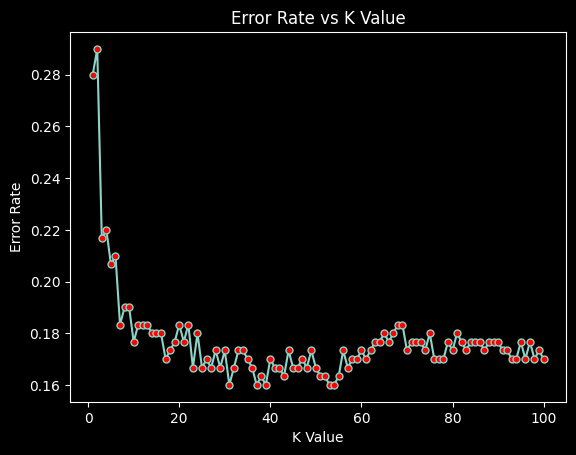

In [9]:
plt.plot(range(1,51), error_rate, marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.plot()

In [10]:
k_value = error_rate.index(min(error_rate))
print(f"Value of K for which the error rate was minimum: {k_value}")

Value of K for which the error rate was minimum: 30


In [12]:
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

print(f"Classification Report:\n{classification_report(y_test, predictions)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300


Confusion Matrix:
[[124  28]
 [ 24 124]]
